In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from cp_utils.cp_dir_file_ops import define_env

if define_env() == 'SERVER':
    dir = '/home/neo/PycharmProjects/Course1/subprojects/sp02_omniiseg_fgn_mmdet/MNISTISEG_FT/Best'
elif define_env() == 'PC':
    dir = 'C:/Users/Art/PycharmProjects/Course1/subprojects/sp02_omniiseg_fgn_mmdet/MNISTISEG_FT/Best'
else:
    raise NotImplementedError

tags = [
    'MNISTISEG_val_FT_Ignore_bbox_mAP_base_',
    'MNISTISEG_val_FT_Ignore_isegm_mAP_base_',
    'MNISTISEG_val_FT_Ignore_bbox_mAP_novel',
    'MNISTISEG_val_FT_Ignore_isegm_mAP_novel',
    'MNISTISEG_val_FT_Ignore_bbox_mAP_all',
    'MNISTISEG_val_FT_Ignore_isegm_mAP_all',
]

/tmp/ipykernel_1810349/1294361990.py:43: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


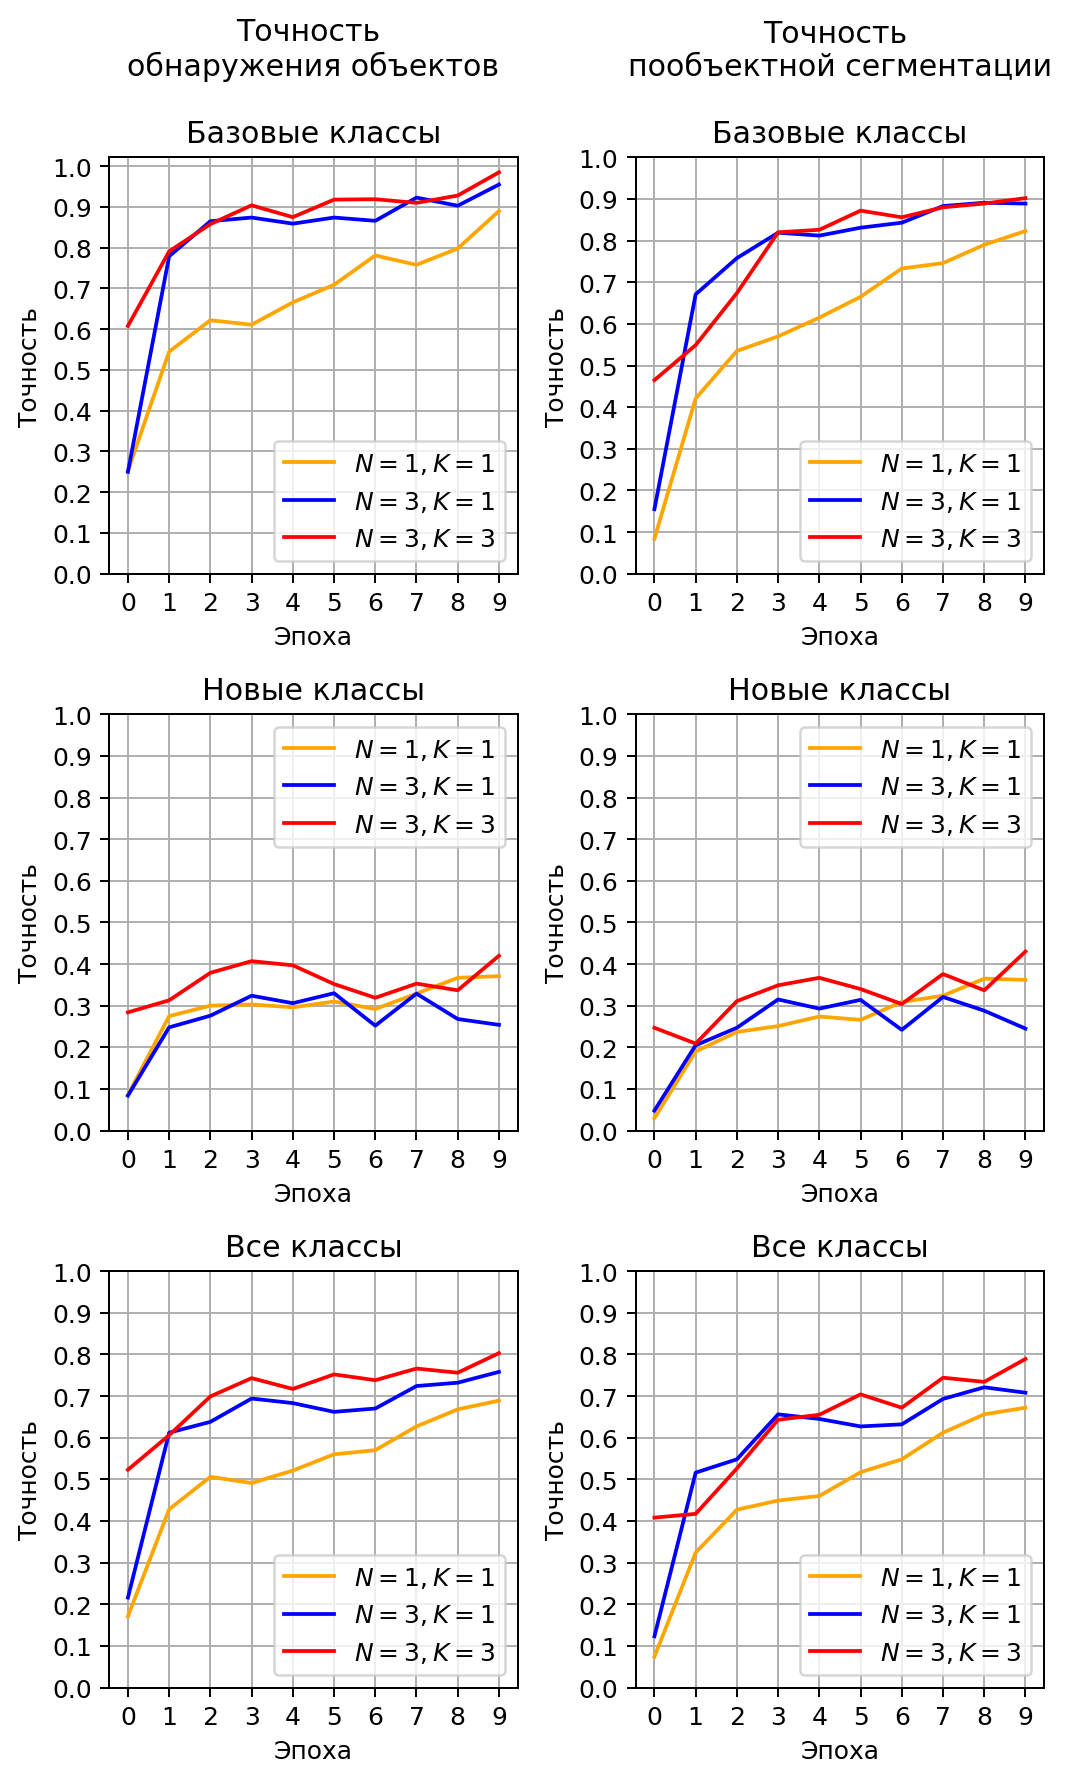

In [2]:
sp0 = f'1-1-2022-02-12_13-12-07_Train-1-1-Scratch-MNISTISEG LR 0.01 WD 5e-05 Adam NoLRRescale CosineLRDecayMinLRRatio 0.01 BEST'
sp1 = f'3-1-2022-02-13_09-31-27_Train-3-1-Scratch-MNISTISEG-Train LR 0.01 WD 5e-05 Adam Cosine0.01 NoLRRescale BEST'
sp2 = f'3-3-2022-02-15_08-24-08_Train-3-3-Scratch-MNISTISEG LR 0.01 WD 5e-05 Adam NoLRRescale CosineLRDecayMinLRRatio 0.01 BEST'

fig, ax = plt.subplots(nrows=3, ncols =2,
                       figsize=(6, 10), dpi=180, facecolor='white',
                       constrained_layout=True)
plt.rcParams['font.size'] = 10

ax[0, 0].set_title('Точность \nобнаружения объектов\n\nБазовые классы')
ax[0, 1].set_title('Точность \nпообъектной сегментации\n\nБазовые классы')
ax[1, 0].set_title('Новые классы')
ax[1, 1].set_title('Новые классы')
ax[2, 0].set_title('Все классы')
ax[2, 1].set_title('Все классы')

arange = np.arange(10)
accuracy = np.arange(0, 105, 10) / 100
colors = ['orange', 'blue', 'red']
labels = ['$N = 1, K = 1$', '$N = 3, K = 1$', '$N = 3, K = 3$']

for i, sp in enumerate([sp0, sp1, sp2]):
    color = colors[i]
    label = labels[i]
    for j, tag in enumerate(tags):
        row = j // 2
        col = j % 2
        fp = os.path.join(dir, sp  + '-tag-' + tag + '.csv')
        # Wall time, Step, Value
        data = np.around(np.loadtxt(fp, delimiter=',', skiprows=1)[:, 2], decimals=3)
        ax[row, col].plot(arange, data, color=color, label=label)
        ax[row, col].legend(loc='lower right')
        if row == 1:
            ax[row, col].legend(loc='upper right')
        ax[row, col].grid(True)
        ax[row, col].set_ylabel('Точность')
        ax[row, col].set_xlabel('Эпоха')
        ax[row, col].set_xticks(arange)
        ax[row, col].set_xticklabels(arange)
        ax[row, col].set_yticks(accuracy)
        ax[row, col].set_yticklabels(accuracy)

plt.tight_layout()
# plt.title(f'Experiments with different learning rates $\gamma$')
plt.savefig('MNISTISEG_FT_Best.png', facecolor=fig.get_facecolor(), edgecolor='none', transparent=False)
plt.show()

In [3]:
plt.close('all')

/tmp/ipykernel_1810349/3488227675.py:73: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


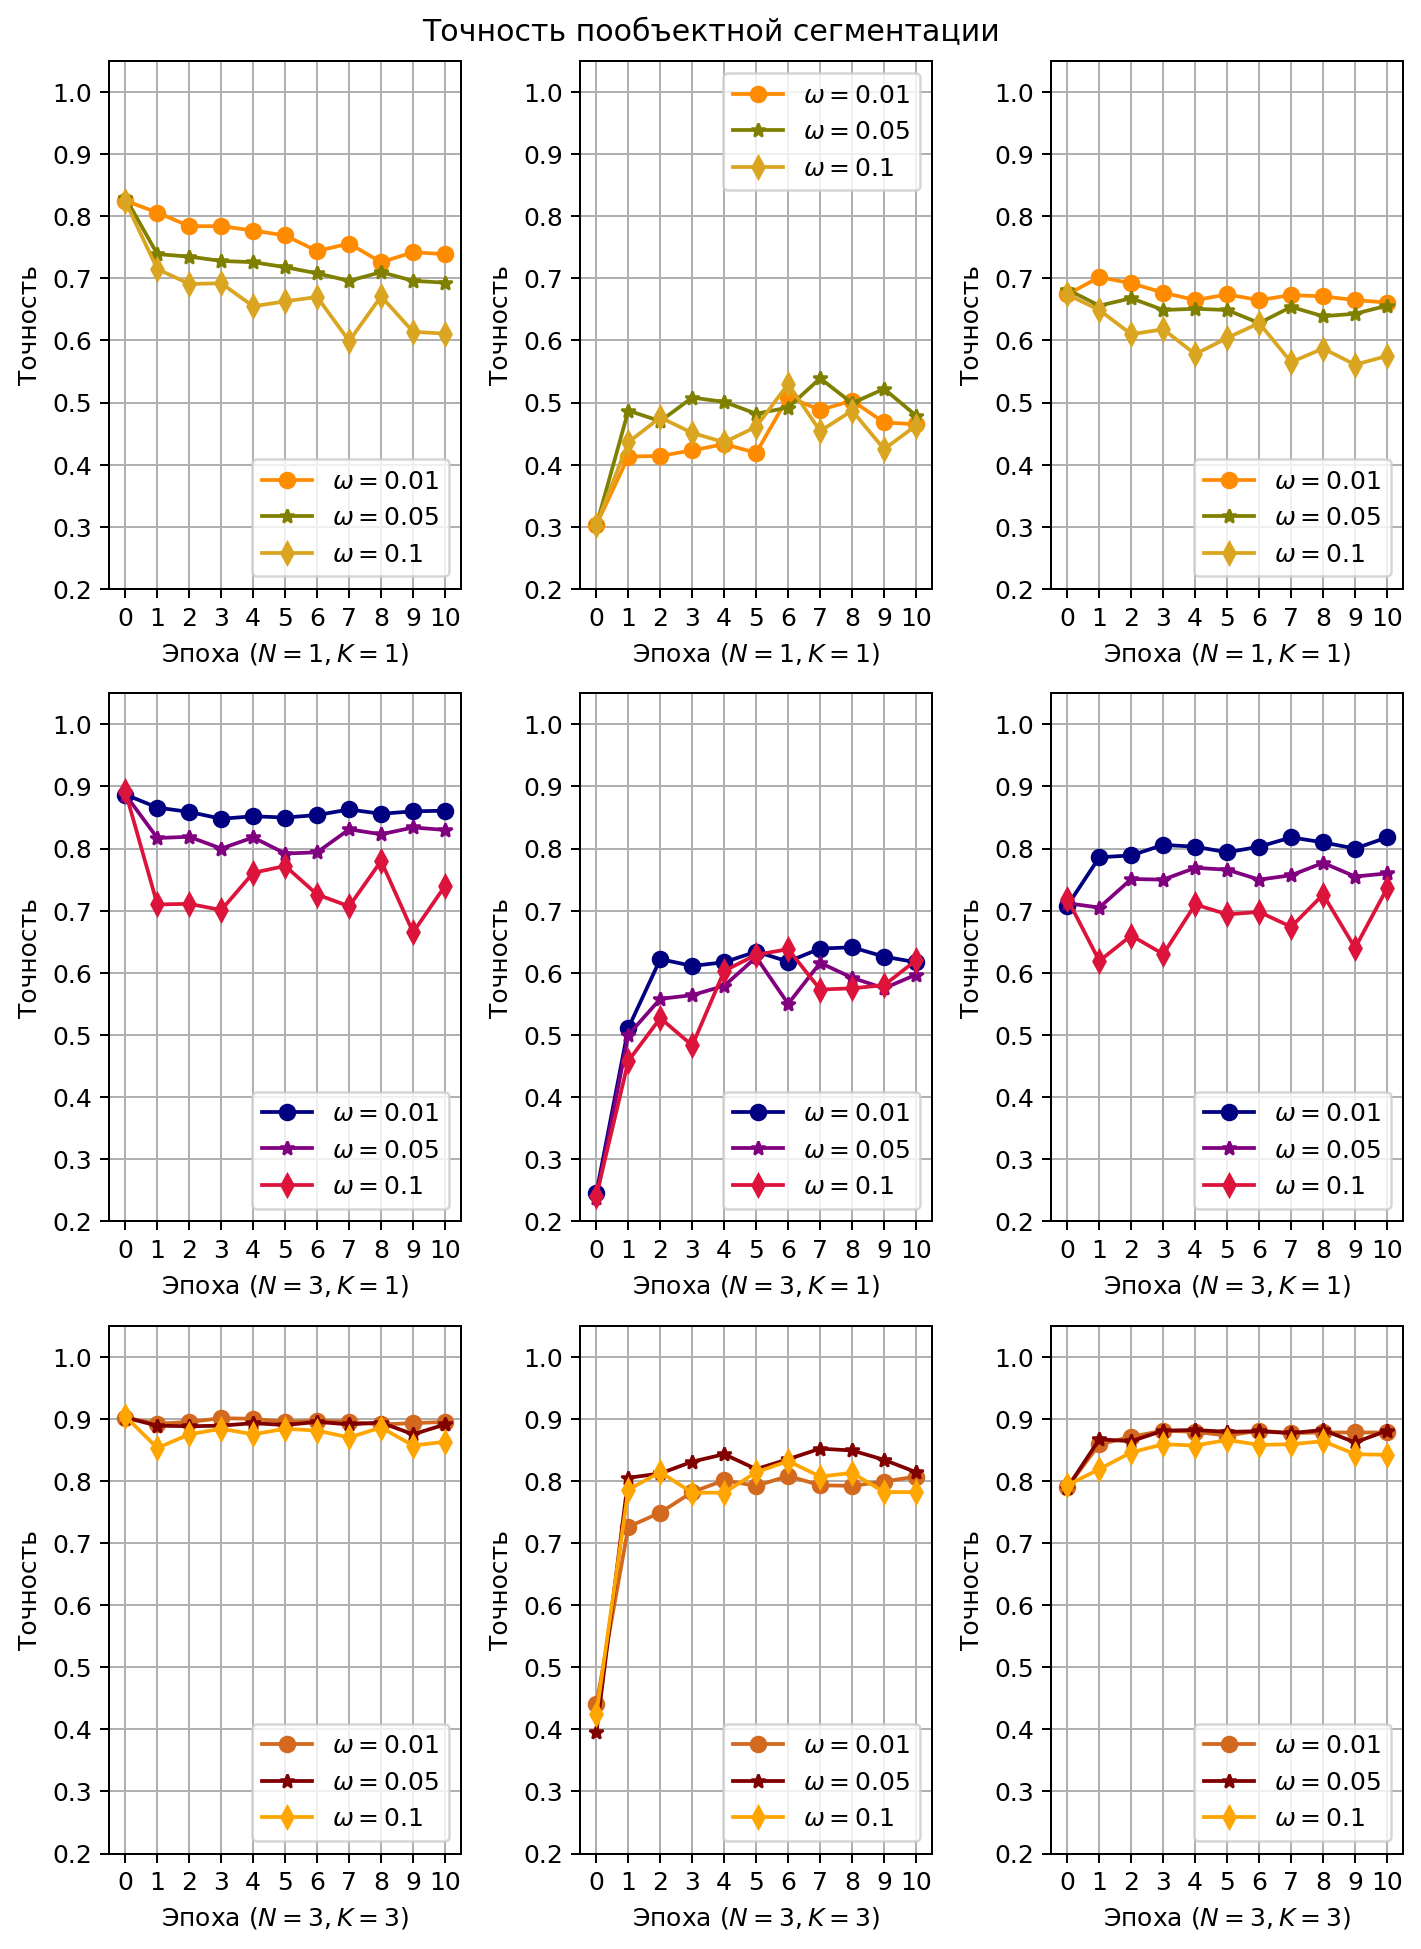

In [7]:
dir_tmp = os.path.split(dir)[0]

sps = [
    '1-1-2022-02-18_13-05-43-FT-MNISTISEG-LR 0.01 WD 5e-05 Adam StepG 0.01',
    '1-1-2022-02-18_13-46-44-FT-MNISTISEG-LR 0.01 WD 5e-05 Adam StepG 0.05',
    '1-1-2022-02-18_14-26-29-FT-MNISTISEG-LR 0.01 WD 5e-05 Adam StepG 0.1',
    '3-1-2022-02-18_15-06-03-FT-MNISTISEG-LR 0.01 WD 5e-05 Adam StepG 0.01',
    '3-1-2022-02-18_16-01-10-FT-MNISTISEG-LR 0.01 WD 5e-05 Adam StepG 0.05',
    '3-1-2022-02-18_16-56-33-FT-MNISTISEG-LR 0.01 WD 5e-05 Adam StepG 0.1',
    '3-3-2022-02-18_17-52-00-FT-MNISTISEG-LR 0.01 WD 5e-05 Adam StepG 0.01',
    '3-3-2022-02-18_19-04-40-FT-MNISTISEG-LR 0.01 WD 5e-05 Adam StepG 0.05',
    '3-3-2022-02-18_20-15-40-FT-MNISTISEG-LR 0.01 WD 5e-05 Adam StepG 0.1'
]

fig, ax = plt.subplots(nrows=3, ncols=3,
                       figsize=(8, 11), dpi=180, facecolor='white',
                       constrained_layout=True)
plt.rcParams['font.size'] = 10

plt.suptitle('Точность пообъектной сегментации')
titles = ['Базовые классы', 'Новые классы', 'Все классы']

arange = np.arange(11)
accuracy = np.arange(0, 105, 10) / 100
colors = ['orange', 'blue', 'red']
colors_groups = [
    ['darkorange', 'olive', 'goldenrod'],
    ['navy', 'purple', 'crimson'],
    ['chocolate', 'maroon', 'orange']
]
markers = ['o', '*', 'd']
labels = ['$N = 1, K = 1$', '$N = 3, K = 1$', '$N = 3, K = 3$']

tags_segm = [
    'MNISTISEG_val_FT_Ignore_isegm_mAP_base_',
    'MNISTISEG_val_FT_Ignore_isegm_mAP_novel',
    'MNISTISEG_val_FT_Ignore_isegm_mAP_all',
]

for i, sp in enumerate(sps):
    fp = os.path.join(dir, sp)
    marker = markers[i % 3]
    color = colors_groups[i // 3][i % 3]
    i = i // 3
    label = labels[i]
    for j, tag in enumerate(tags_segm):
        # ax[i, j].set_title()
        # Wall time, Step, Value
        _sp = sp + '-tag-' + tag + '.csv'
        fp = os.path.join(dir_tmp, _sp)
        # print(os.path.exists(fp), _sp)

        data = np.around(np.loadtxt(fp, delimiter=',', skiprows=1)[:, 2], decimals=3)
        row = i
        col = j
        num = sp.split(' ')[-1].strip()
        num = f'$\omega = {num}$'
        ax[row, col].plot(data, color=color, marker=marker, label=num)
        # ax[row, col].legend(loc='lower right')
        if row == 0 and col == 1:
            ax[row, col].legend(loc='upper right')
        else:
            ax[row, col].legend(loc='lower right')
        ax[row, col].grid(True)
        ax[row, col].set_ylabel('Точность')
        ax[row, col].set_xlabel(f'Эпоха ({label})')
        ax[row, col].set_xticks(arange)
        ax[row, col].set_xticklabels(arange)
        ax[row, col].set_yticks(accuracy)
        ax[row, col].set_yticklabels(accuracy)
        ax[row, col].set_ylim(0.2, 1.05)

plt.tight_layout()
# plt.title(f'Experiments with different learning rates $\gamma$')
plt.savefig('MNISTISEG_FT_Compare.png', facecolor=fig.get_facecolor(), edgecolor='none', transparent=False)
plt.show()

In [5]:
dir_tmp = os.path.split(dir)[0]

for i, sp in enumerate(sps):
    fp = os.path.join(dir, sp)
    i = i // 3
    label = labels[i]
    for j, tag in enumerate(tags_segm):
        if j != 1:
            continue
        # Wall time, Step, Value
        _sp = sp + '-tag-' + tag + '.csv'
        fp = os.path.join(dir_tmp, _sp)
        # print(os.path.exists(fp), _sp)
        # continue
        data = np.around(np.loadtxt(fp, delimiter=',', skiprows=1)[:, 2], decimals=3)
        k = np.argmax(data)

        tag = tag.replace('val_FT_Ignore', 'test_FT_Use')
        _sp = sp + '-tag-' + tag + '.csv'
        fp = os.path.join(dir_tmp, _sp)
        data_test = np.around(np.loadtxt(fp, delimiter=',', skiprows=1)[:, 2], decimals=3)

        num = sp.split(' ')[-1].strip()
        omega = f'$\omega = {num}$'
        print(titles[j] + f' ({label})', num, 'Val', data[k], ' Test', data_test[k])
        # print(num, data[k], data_test[k])


Новые классы ($N = 1, K = 1$) 0.01 Val 0.509  Test 0.499
Новые классы ($N = 1, K = 1$) 0.05 Val 0.539  Test 0.529
Новые классы ($N = 1, K = 1$) 0.1 Val 0.53  Test 0.504
Новые классы ($N = 3, K = 1$) 0.01 Val 0.641  Test 0.757
Новые классы ($N = 3, K = 1$) 0.05 Val 0.625  Test 0.74
Новые классы ($N = 3, K = 1$) 0.1 Val 0.638  Test 0.716
Новые классы ($N = 3, K = 3$) 0.01 Val 0.808  Test 0.835
Новые классы ($N = 3, K = 3$) 0.05 Val 0.852  Test 0.861
Новые классы ($N = 3, K = 3$) 0.1 Val 0.832  Test 0.849
